# Fake News Detection

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from sklearn import preprocessing
import re
from wordcloud import WordCloud
import pandas
import string
from nltk.corpus import stopwords
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Dataset

true = pd.read_csv(r"True.csv")
fake = pd.read_csv(r"Fake.csv")


In [3]:
#combine

true['label']='fake'
fake['label']='true'

data = pd.concat([true, fake], axis=0)
data.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",fake


In [4]:
#Kullanıcagımız kolonları seçiyoruz.

data=data[['text','label']]
data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,fake
1,WASHINGTON (Reuters) - Transgender people will...,fake
2,WASHINGTON (Reuters) - The special counsel inv...,fake
3,WASHINGTON (Reuters) - Trump campaign adviser ...,fake
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,fake


# Data analysis and Preprocessing

In [5]:
#Lowercase
data['text']=data['text'].str.lower()

In [6]:
#Null values
np.sum(data.isnull().any(axis=1))

0

# Distribution of label

In [7]:
data["label"].value_counts()

true    23481
fake    21417
Name: label, dtype: int64

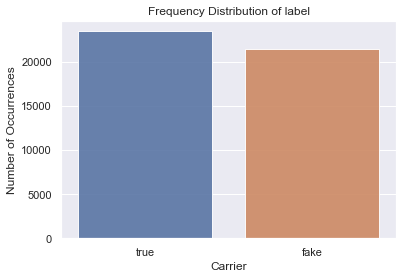

In [8]:
#Frequency distribution of label
%matplotlib inline
carrier_count = data["label"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

# Tokenization

In [9]:
tokenizer = RegexpTokenizer(r'\w+')
data["text"] = data["text"].apply(tokenizer.tokenize)

In [10]:
data["text"].head()

0    [washington, reuters, the, head, of, a, conser...
1    [washington, reuters, transgender, people, wil...
2    [washington, reuters, the, special, counsel, i...
3    [washington, reuters, trump, campaign, adviser...
4    [seattle, washington, reuters, president, dona...
Name: text, dtype: object

# Stop words of english

In [11]:
#clear stop words

stopwords_list = stopwords.words('english')
data["text"]=data["text"].apply(lambda x: [item for item in x if item not in stopwords_list])
data["text"].head()

0    [washington, reuters, head, conservative, repu...
1    [washington, reuters, transgender, people, all...
2    [washington, reuters, special, counsel, invest...
3    [washington, reuters, trump, campaign, adviser...
4    [seattle, washington, reuters, president, dona...
Name: text, dtype: object

# Word cloud 

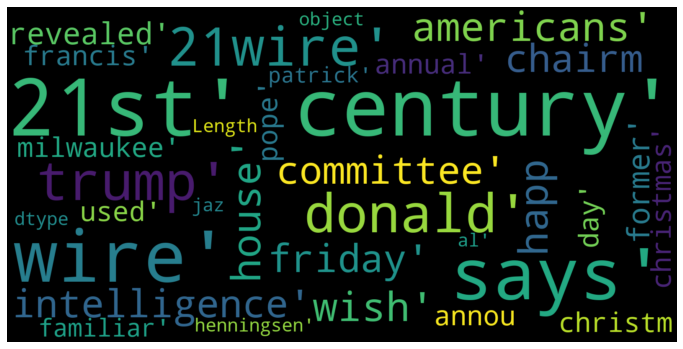

In [12]:
#True
data1=data[data['label']=='true']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

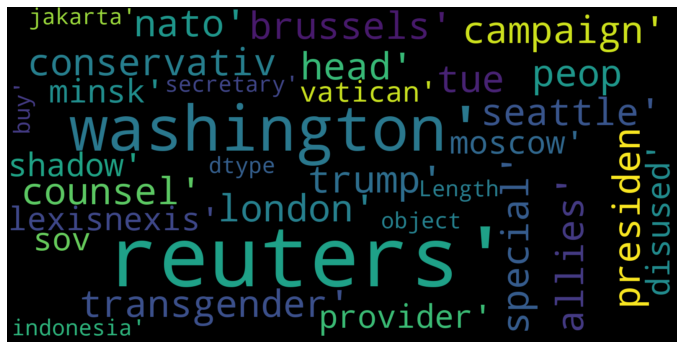

In [13]:
#Fake
data1=data[data['label']=='fake']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Features Extraction From the texts Text

In [14]:
#Unigram features

from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

In [15]:
#preparing features for traning and testing
unigramdataGet= word_vectorizer.fit_transform(data['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,000,1,10,100,11,12,13,14,15,16,...,working,world,wrong,wrote,year,years,yes,york,young,youtube
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#drop text

In [17]:
#feature selection from unigram
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


selector = SelectKBest(chi2, k=700)
selector.fit(unigramdata, data['label'])

unigramdata = selector.transform(unigramdata)
print(unigramdata.shape)

(44898, 700)


# Train & Test

In [18]:
X=unigramdata
y=data['label']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# SVM

In [19]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, max_iter=500)

In [20]:
y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.98


In [21]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.98      0.98      0.98      6474
        true       0.98      0.98      0.98      6996

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470







confusion matrix


[[6336  138]
 [ 121 6875]]




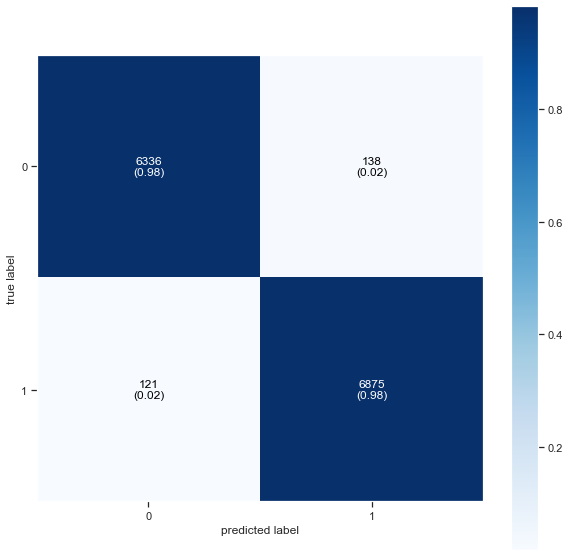

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Naive Bayes Algorithm

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(var_smoothing=1e-08)

In [24]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.95


In [25]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.94      0.96      0.95      6474
        true       0.96      0.94      0.95      6996

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470







confusion matrix


[[6215  259]
 [ 422 6574]]




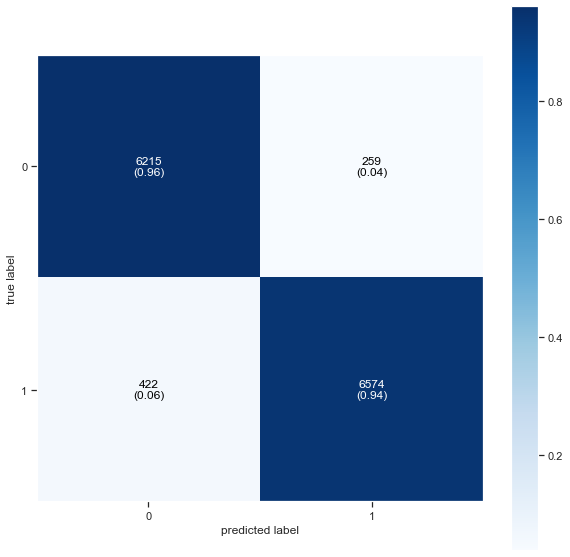

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Logistic Regression Algorithm

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2)

In [28]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.98


In [29]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.98      0.98      0.98      6474
        true       0.98      0.98      0.98      6996

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470







confusion matrix


[[6341  133]
 [ 118 6878]]




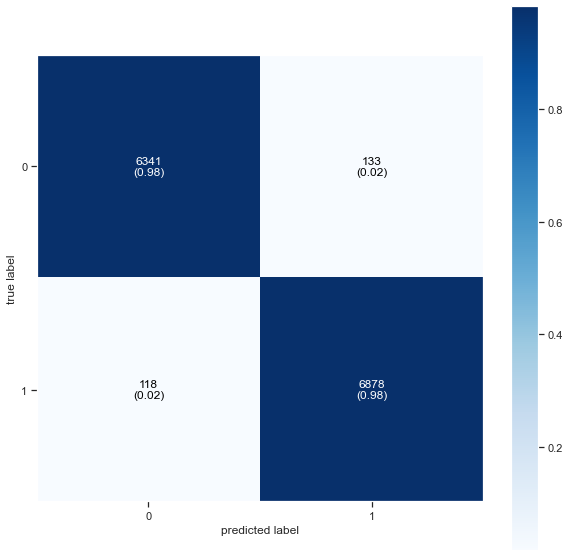

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Random Forest Algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=100)

In [32]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.97


In [33]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.96      0.98      0.97      6474
        true       0.98      0.96      0.97      6996

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470







confusion matrix


[[6331  143]
 [ 251 6745]]




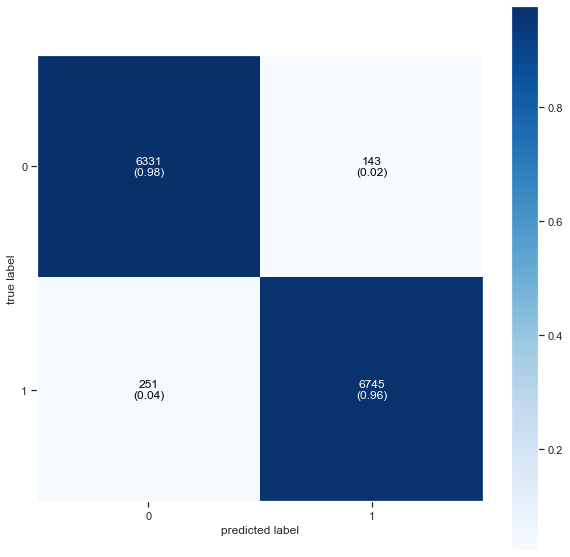

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [35]:
#!pip install PrettyTable
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.98   |
|    Naive Bayes Algorithm     |   0.95   |
| LogisticRegression Algorithm |   0.98   |
|   Random Forest Algorithm    |   0.97   |
+------------------------------+----------+


